# Feature Engineering

Loads all next_day_wildfire_spread data and applies feature engineering steps to it.

In [19]:
from matplotlib import colors
import matplotlib.pyplot as plt
from joblib import load
from config import ROOT_DIR
from pathlib import Path
import torch

from src.feature_engineering.pipeline_feature_engineering import FeatureEngineering

In [14]:
pipeline = FeatureEngineering(testing=True)
pipeline.run()

C:\Users\adria\Documents\10_GEO_FS24\ESC403\Group_Project\ESC403_Project\src\feature_engineering\tasks\fire_direction.py:14: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity = np.dot(vec_to_point, vec_direction) / (


Written <class 'torch.Tensor'> to C:\Users\adria\Documents\10_GEO_FS24\ESC403\Group_Project\ESC403_Project\Data\trial\X_fe.pkl.
Written <class 'torch.Tensor'> to C:\Users\adria\Documents\10_GEO_FS24\ESC403\Group_Project\ESC403_Project\Data\trial\y_fe.pkl.


In [15]:
testing = True
read_path = r"Data/trial/" if testing else r"Data/feature_engineered/"

X = load(ROOT_DIR / Path(read_path, "X_fe.pkl"))
y = load(ROOT_DIR / Path(read_path, "y_fe.pkl"))

### Data Loading

In [20]:
TITLES = [
  'Elevation',
  'Wind\ndirection',
  'Wind\nvelocity',
  'Min\ntemp',
  'Max\ntemp',
  'Humidity',
  'Precip',
  'Drought',
  'Vegetation',
  'Population\ndensity',
  'Energy\nrelease\ncomponent',
  'Previous\nfire\nmask',
  'Distance to Fire',
  'Flow Accumulation',
  'Fire Direction',
  'Next Day Fire Mask'
]

In [21]:
# Number of rows of data samples to plot
n_rows = 5
# Number of data variables
n_features = X.shape[3]
# Variables for controllong the color map for the fire masks
CMAP = colors.ListedColormap(['black', 'silver', 'orangered'])
BOUNDS = [-1, -0.1, 0.001, 1]
NORM = colors.BoundaryNorm(BOUNDS, CMAP.N)

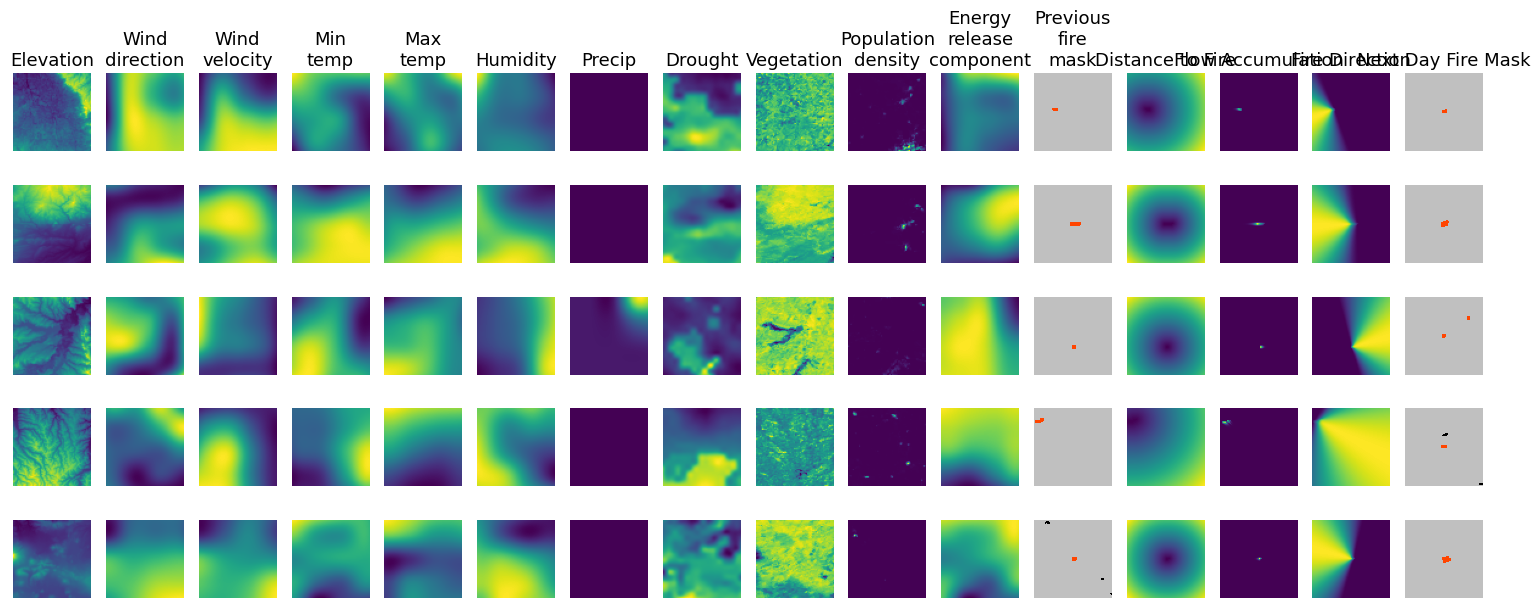

In [48]:
fig = plt.figure(figsize=(15,6.5))

for i in range(n_rows):
  for j in range(n_features + 1):
    plt.subplot(n_rows, n_features + 1, i * (n_features + 1) + j + 1)
    if i == 0:
      plt.title(TITLES[j], fontsize=13)
    if j in [11, 15]:
      if j == 15:
        plt.imshow(y[i, :, :, 0], cmap=CMAP, norm=NORM)
      else:
        plt.imshow(X[i, :, :, j], cmap=CMAP, norm=NORM)
    else:
      plt.imshow(X[i, :, :, j], cmap='viridis')


    plt.axis('off')
plt.tight_layout()